In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
shutil.copy('/content/drive/My Drive/kaggle.json', 'kaggle.json')

'kaggle.json'

In [ ]:
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
# !mkdir /.kaggle
# !mv kaggle.json /.kaggle
# !mv /.kaggle /root/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
import shutil
import os

# Path to the destination directory in Google Colab
dest_dir = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Copy the kaggle.json file from Google Drive to the destination directory
shutil.copy('/content/drive/My Drive/kaggle.json', dest_dir)

'/root/.kaggle/kaggle.json'

In [5]:
# https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [01:31<00:00, 25.2MB/s]
100% 2.04G/2.04G [01:31<00:00, 24.0MB/s]


In [ ]:
!rm -rf /content/datasets

In [6]:
import zipfile

# Path to the zip file
zip_file_path = "/content/plantvillage-dataset.zip"

# Directory where you want to extract the files
extract_dir = "/content/datasets/plantvillage"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [7]:
extract_dir = "/content/datasets/plantvillage"

In [8]:
data_path = os.path.join(extract_dir, 'plantvillage dataset')
color_path = os.path.join(data_path, 'color')
grayscale_path = os.path.join(data_path, 'grayscale')
segmented_path = os.path.join(data_path, 'segmented')

In [ ]:
os.listdir(color_path) == os.listdir(grayscale_path) == os.listdir(segmented_path)

True

In [ ]:
print(f"Number of classes: {len(os.listdir(color_path))}")

Number of classes: 3


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import choice, randint


def show_example(path1, path2, path3, cls_name, img_idx):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    paths = [path1, path2, path3]
    for i in range(3):
        image_name = os.listdir(f"{paths[i]}/{cls_name}")[img_idx]
        img_path = f"{paths[i]}/{cls_name}/{image_name}"
        img = mpimg.imread(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
    fig.suptitle(f"{cls_name} - {image_name}")
    plt.show()

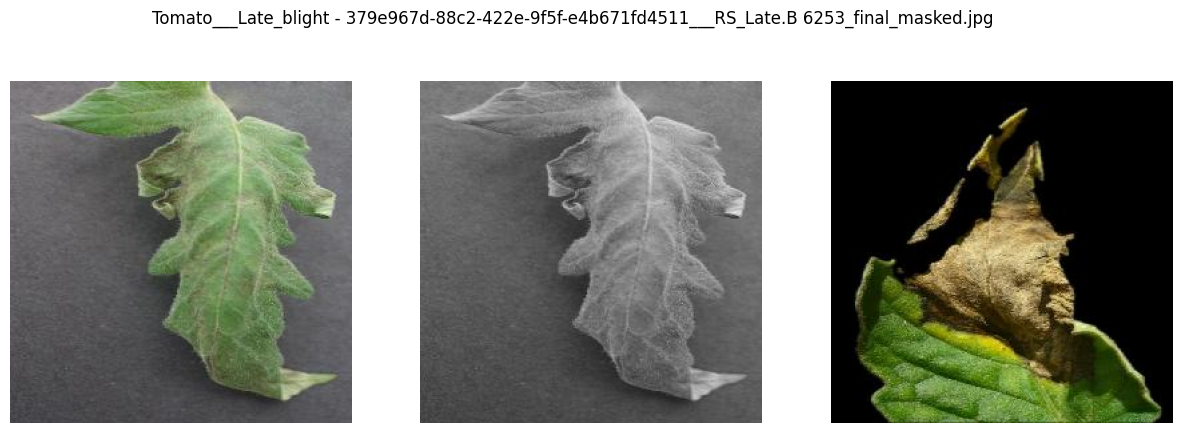

In [ ]:
# Example usage
cls = choice(os.listdir(color_path))
# cls_images = os.listdir(os.path.join(color_path, cls))
img_idx = randint(0, len(os.listdir(os.path.join(color_path, cls))) - 1)

show_example(color_path, grayscale_path, segmented_path, cls, img_idx)

In [ ]:
color_lst = os.listdir(color_path)
grayscale_lst = os.listdir(grayscale_path)
segmented_lst = os.listdir(segmented_path)

color_imgs = []
grayscale_imgs = []
segmented_imgs = []

for cls in color_lst:
    color_cls = os.path.join(color_path, cls)
    grayscale_cls = os.path.join(grayscale_path, cls)
    segmented_cls = os.path.join(segmented_path, cls)

    color_imgs.append(os.listdir(color_cls))
    grayscale_imgs.append(os.listdir(grayscale_cls))
    segmented_imgs.append(os.listdir(segmented_cls))

    lens = len(os.listdir(color_cls)) == len(os.listdir(grayscale_cls)) == len(os.listdir(segmented_cls))
    print(f"{cls}, equal examples: {lens}")
    # print(len(os.listdir(color_cls)), len(os.listdir(grayscale_cls)), len(os.listdir(segmented_cls)))
    # print(os.listdir(color_cls)[0], os.listdir(grayscale_cls)[0], os.listdir(segmented_cls)[0])
#     os.path.join()

Corn_(maize)___Northern_Leaf_Blight, equal examples: True
Squash___Powdery_mildew, equal examples: True
Tomato___Tomato_Yellow_Leaf_Curl_Virus, equal examples: True
Potato___healthy, equal examples: True
Potato___Late_blight, equal examples: True
Apple___Cedar_apple_rust, equal examples: True
Raspberry___healthy, equal examples: True
Strawberry___Leaf_scorch, equal examples: True
Peach___healthy, equal examples: True
Tomato___Late_blight, equal examples: True
Tomato___Spider_mites Two-spotted_spider_mite, equal examples: True
Tomato___Tomato_mosaic_virus, equal examples: True
Tomato___Early_blight, equal examples: True
Apple___Apple_scab, equal examples: True
Apple___Black_rot, equal examples: True
Cherry_(including_sour)___healthy, equal examples: True
Tomato___Leaf_Mold, equal examples: True
Grape___Leaf_blight_(Isariopsis_Leaf_Spot), equal examples: True
Tomato___Target_Spot, equal examples: True
Corn_(maize)___Common_rust_, equal examples: True
Soybean___healthy, equal examples: Tr

In [ ]:
color_imgs == grayscale_imgs == segmented_imgs

False

In [ ]:
# for colored, segmented in zip(color_imgs, segmented_imgs):
#     for imgc, imgs in zip(colored, segmented):
#         print(imgc, '\n', imgs, end='\n\n\n')

In [ ]:
import os
import cv2
import numpy as np

def calculate_mean_std(data_dir):
    num_images = 0
    mean_sum = np.zeros(3)  # Accumulate sum of means for each channel
    std_sum = np.zeros(3)   # Accumulate sum of stds for each channel

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
            mean_sum += np.mean(image, axis=(0, 1))
            std_sum += np.std(image, axis=(0, 1))
            num_images += 1

    # Calculate the mean and std across all images
    mean = mean_sum / num_images
    std = std_sum / num_images

    return mean, std

In [ ]:
# Usage example
mean, std = calculate_mean_std(color_path)
print("Mean across all images and channels:", mean)
print("Standard deviation across all images and channels:", std)

Mean across all images and channels: [118.93793044 124.72121312 104.63947048]
Standard deviation across all images and channels: [44.91041089 38.25811563 49.09532777]


In [9]:
from sklearn.model_selection import train_test_split

def split_data(data_dir, test_size=0.2, valid_size=0.2):
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
            train_images, valid_images = train_test_split(train_images, test_size=valid_size, random_state=42)

            train_dir = os.path.join(data_dir, 'train', class_name)
            valid_dir = os.path.join(data_dir, 'valid', class_name)
            test_dir = os.path.join(data_dir, 'test', class_name)

            os.makedirs(train_dir, exist_ok=True)
            os.makedirs(valid_dir, exist_ok=True)
            os.makedirs(test_dir, exist_ok=True)

            for image in train_images:
                os.rename(os.path.join(class_dir, image), os.path.join(train_dir, image))
            for image in valid_images:
                os.rename(os.path.join(class_dir, image), os.path.join(valid_dir, image))
            for image in test_images:
                os.rename(os.path.join(class_dir, image), os.path.join(test_dir, image))

            # Remove empty class directories
            if not os.listdir(class_dir):
                os.rmdir(class_dir)


In [10]:
# color_path, grayscale_path, segmented_path
split_data(color_path)
split_data(grayscale_path)
split_data(segmented_path)

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import json
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses


class ClassifierTF:
    def __init__(self, data_dir=color_path, model_name='densenet121', input_size=1024, hidden_layers=[512, 256],
                 output=38, loss_function_name='sparse_categorical_crossentropy', optimizer_name='adam',
                 epochs=15, dropout=.2, learnrate=.002):

        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output = output
        self.epochs = epochs
        self.data_dir = data_dir

        # Dictionary mapping model names to their definitions
        models_dict = {
            'densenet121': tf.keras.applications.DenseNet121,
            'inceptionv3': tf.keras.applications.InceptionV3,
            'mobilenetv2': tf.keras.applications.MobileNetV2,
            # Add more models here
        }

        base_model = models_dict[model_name](
            include_top=False, weights='imagenet', input_shape=(224, 224, 3)
        )

        classifier = tf.keras.models.Sequential([
            tf.keras.layers.GlobalAveragePooling2D(),
        ])

        for units in hidden_layers:
            classifier.add(tf.keras.layers.Dense(units, activation='relu'))
            classifier.add(tf.keras.layers.Dropout(dropout))

        classifier.add(tf.keras.layers.Dense(output, activation='softmax'))

        self.model = tf.keras.Model(inputs=base_model.input, outputs=classifier(base_model.output))

        for layer in base_model.layers:
            layer.trainable = False

        # Dictionary mapping loss function names to their definitions
        loss_functions_dict = {
            'sparse_categorical_crossentropy': tf.keras.losses.SparseCategoricalCrossentropy(),
            'categorical_crossentropy': tf.keras.losses.CategoricalCrossentropy(),
            # Add more loss functions here
        }
        self.criterion = loss_functions_dict[loss_function_name]

        # Dictionary mapping optimizer names to their definitions
        optimizers_dict = {
            'adam': tf.keras.optimizers.Adam,
            'sgd': tf.keras.optimizers.SGD,
            # Add more optimizers here
        }
        self.optimizer = optimizers_dict[optimizer_name](learning_rate=learnrate)

        self.model.compile(optimizer=self.optimizer, loss=self.criterion, metrics=['accuracy'])

        # self.model = model


    def dataloader(self, train_transforms, test_transforms, batch_size=64):
        train_data = tf.keras.preprocessing.image_dataset_from_directory(
            self.data_dir + '/train', batch_size=batch_size, image_size=(224, 224)
        )
        # Get the class names and their corresponding indices
        class_names = train_data.class_names
        self.class_idx = {class_name: i for i, class_name in enumerate(class_names)}

        # Save class_idx as JSON
        with open('class_idx.json', 'w') as f:
            json.dump(self.class_idx, f)

        test_data = tf.keras.preprocessing.image_dataset_from_directory(
            self.data_dir + '/test', batch_size=batch_size, image_size=(224, 224)
        )

        try:
            valid_data = tf.keras.preprocessing.image_dataset_from_directory(
                self.data_dir + '/valid', batch_size=batch_size, image_size=(224, 224)
            )
            return train_data, valid_data, test_data
        except:
            return train_data, test_data


    def save_loss_vals(self, train_losses, test_losses, fname='train_test_losses.json'):
        # Convert EagerTensor objects to NumPy arrays
        train_losses_np = [loss.numpy() for loss in train_losses]
        test_losses_np = [loss.numpy() for loss in test_losses]

        # Create a dictionary to store the losses
        loss_dict = {'train_losses': train_losses_np, 'test_losses': test_losses_np}

        # Serialize the dictionary to a JSON file
        with open(fname, 'w') as f:
            json.dump(loss_dict, f, default=lambda x: x.tolist())  # Convert numpy arrays to lists for JSON serialization


    def load_json_data(self, fname):
        with open(fname, 'r') as f:
            data_dict = json.load(f)
        return data_dict #['train_losses'], loss_dict['test_losses']

    def plot_loss_vals(self, train_loss, valid_loss):
        plt.plot(train_loss, label='Training loss')
        plt.plot(valid_loss, label='Testing loss')
        plt.legend(frameon=False);

    def save_model(self, fname='checkpoint'):
        # Save model weights
        self.model.save_weights(fname + '.h5')

        # Save additional information
        with open(fname + '_info.txt', 'w') as f:
            f.write(f"input_size: {self.input_size}\n")
            f.write(f"hidden_layers: {self.hidden_layers}\n")
            f.write(f"output_size: {self.output}\n")
            f.write(f"epochs: {self.epochs}\n")

    def load_model(self, fname='checkpoint'):
        # Load model weights
        self.model.load_weights(fname + '.h5')

        # Load additional information
        info = {}
        with open(fname + '_info.txt', 'r') as f:
            for line in f:
                key, value = line.strip().split(': ')
                info[key] = int(value) if key in ['input_size', 'hidden_size', 'output_size', 'epochs'] else eval(value)

        # Set model attributes
        for key, value in info.items():
            setattr(self, key, value)

        # Return the loaded information
        return info.get('epochs', None), info.get('input_size', None), info.get('hidden_size', None), info.get('output_size', None)






class TrainModelTF(ClassifierTF):
    def __init__(self, data_dir=color_path, model_name='densenet121', input_size=224,
                 hidden_layers=[512, 256], output=38, loss_function_name='sparse_categorical_crossentropy',
                 optimizer_name='adam', epochs=15, dropout=.2, learnrate=.002):
        super().__init__(data_dir, model_name, input_size, hidden_layers, output,
                         loss_function_name, optimizer_name, epochs, dropout, learnrate)

    def train(self, trainloader, validloader, epochs, stop_thresh=-2,
              print_every=60, save_checkpoint=True, save_loss=True, plot_loss=True):
        steps = 0
        best_accuracy = 0
        train_losses, valid_losses = [], []

        for epoch in range(epochs):
            train_loss = tf.keras.metrics.Mean()
            valid_loss = tf.keras.metrics.Mean()
            accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

            for images, labels in trainloader:
                with tf.GradientTape() as tape:
                    predictions = self.model(images, training=True)
                    loss = self.criterion(labels, predictions)

                gradients = tape.gradient(loss, self.model.trainable_variables)
                self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

                train_loss(loss)

            for images, labels in validloader:
                predictions = self.model(images, training=False)
                loss = self.criterion(labels, predictions)
                valid_loss(loss)
                accuracy(labels, predictions)

            train_losses.append(train_loss.result())
            valid_losses.append(valid_loss.result())

            if epoch % print_every == 0:
                print(f"Epoch {epoch + 1}/{epochs}.. "
                      f"Train loss: {train_loss.result():.4f}.. "
                      f"Validation loss: {valid_loss.result():.4f}.. "
                      f"Validation accuracy: {accuracy.result() * 100:.2f}%")

            if accuracy.result() > best_accuracy:
                best_accuracy = accuracy.result()
                if save_checkpoint:
                    self.save_model()
            else:
                if epoch % print_every == 0:
                    print(f"Stopping early at epoch {epoch + 1} as accuracy did not improve.")
                break

        if save_loss:
            self.save_loss_vals(train_losses, valid_losses)
        if plot_loss:
            self.plot_loss_vals(train_losses, valid_losses)

    def test(self, testloader):
        test_loss = tf.keras.metrics.Mean()
        test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

        for images, labels in testloader:
            predictions = self.model(images, training=False)
            loss = self.criterion(labels, predictions)
            test_loss(loss)
            test_accuracy(labels, predictions)

        print(f"Test loss: {test_loss.result():.4f}.. "
              f"Test accuracy: {test_accuracy.result() * 100:.2f}%")

In [12]:
class DataProcessingTF:
    def __init__(self):
        pass

    def transform(self, rotation=30, crop=224, resize=255, mean=[118.93793044, 124.72121312, 104.63947048],
                  std=[44.9104108, 38.25811563, 49.09532777]):
        # Define transforms for the training data and testing data
        def train_transform(image):
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_flip_up_down(image)
            image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
            image = tf.image.random_crop(image, size=[crop, crop, 3])
            image = tf.image.random_brightness(image, max_delta=0.3)
            image = tf.image.random_contrast(image, lower=0.6, upper=1.4)
            image = tf.image.random_saturation(image, lower=0.6, upper=1.4)
            image = tf.image.random_hue(image, max_delta=0.1)
            image = tf.clip_by_value(image, 0.0, 1.0)
            image = tf.image.resize(image, size=[resize, resize])
            image = (image - mean) / std
            return image

        def test_transform(image):
            image = tf.image.resize(image, size=[resize, resize])
            image = tf.image.central_crop(image, central_fraction=crop/resize)
            image = (image - mean) / std
            return image

        return train_transform, test_transform

    def imshow(self, image, ax=None, title=None, normalize=True):
        """Imshow for Tensor."""
        if ax is None:
            fig, ax = plt.subplots()

        # Convert tensor to numpy array and squeeze if needed
        if isinstance(image, tf.Tensor):
            image = image.numpy()
            if image.ndim == 4:
                image = np.squeeze(image, axis=0)

        # Ensure image is in (H, W, C) format
        if image.shape[2] == 1:
            image = np.squeeze(image, axis=2)
        elif image.shape[2] == 3:
            image = image.astype(np.uint8)
        else:
            raise ValueError("Invalid image shape")

        ax.imshow(image)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        if title:
            ax.set_title(title)
        return ax

In [13]:
train_transforms, test_transforms = DataProcessingTF().transform()

In [14]:
classifier = TrainModelTF()  # model_name='mobilenetv2'

29084464/29084464 [==============================] - 2s 0us/step


In [15]:
trainloader, validloader, testloader = classifier.dataloader(train_transforms, test_transforms)

Found 34727 files belonging to 38 classes.
Found 10876 files belonging to 38 classes.
Found 8702 files belonging to 38 classes.


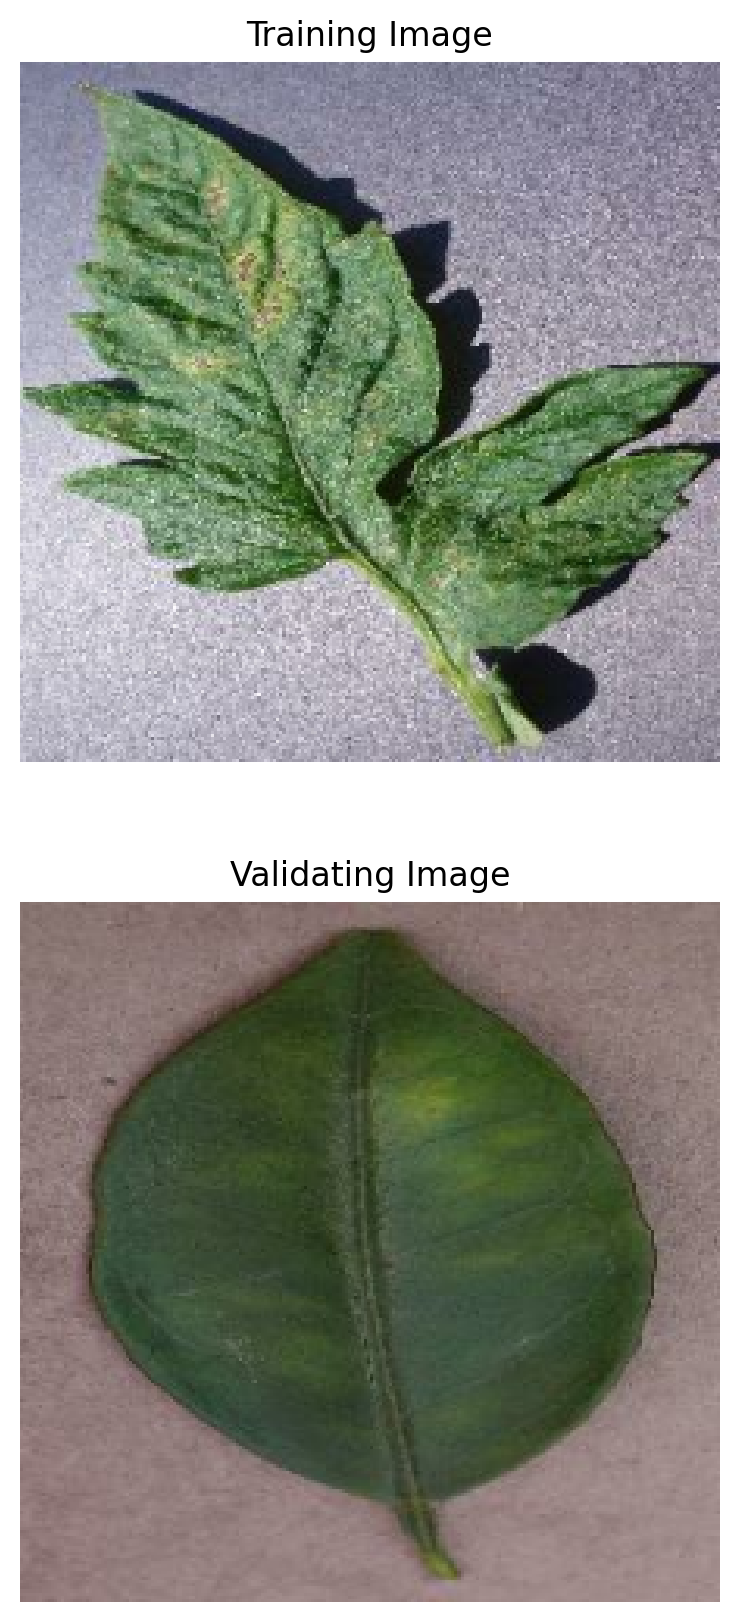

In [ ]:
plt.figure(figsize=(6, 10))

ax = plt.subplot(2, 1, 1)
imgs, labels = next(iter(trainloader))
DataProcessingTF().imshow(imgs[0], ax, 'Training Image')

ax = plt.subplot(2, 1, 2)
imgs, labels = next(iter(validloader))
DataProcessingTF().imshow(imgs[0], ax, 'Validating Image');

Epoch 1/5.. Train loss: 1.2549.. Validation loss: 0.5239.. Validation accuracy: 83.81%


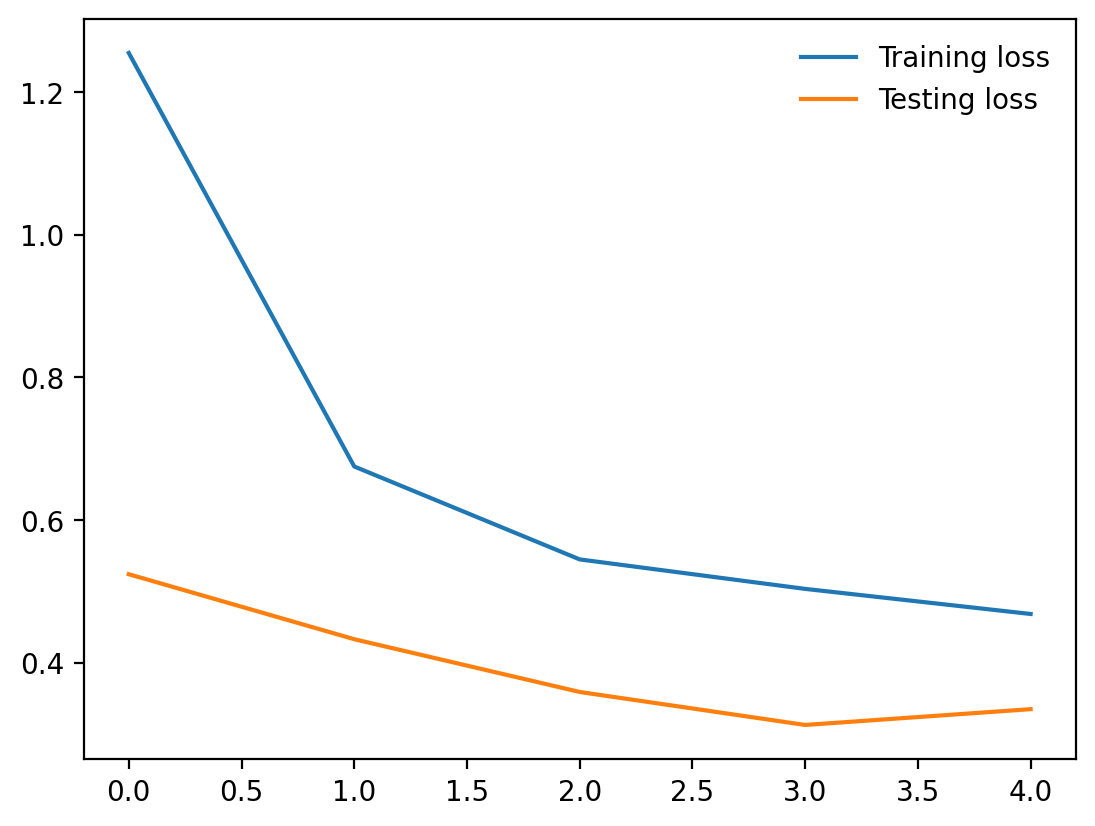

In [16]:
classifier.train(trainloader, validloader, 5)

In [17]:
classifier.test(trainloader)

Test loss: 0.2816.. Test accuracy: 90.60%


In [18]:
classifier.test(validloader)

Test loss: 0.3345.. Test accuracy: 89.40%


In [19]:
classifier.test(testloader)

Test loss: 0.3498.. Test accuracy: 88.47%


In [20]:
classifier_2 = TrainModelTF()

In [21]:
classifier_2.test(testloader)

Test loss: 8.1685.. Test accuracy: 1.66%


In [22]:
classifier_2.load_model()

(15, 224, None, 38)

In [23]:
classifier_2.test(testloader)

Test loss: 0.3345.. Test accuracy: 88.76%


In [69]:
classifier.class_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [70]:
classifier_2.class_idx = classifier_2.load_json_data('class_idx.json')

In [71]:
classifier_2.class_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [118]:
import os
import numpy as np
import tensorflow as tf
from random import choice
from PIL import Image
import matplotlib.pyplot as plt

class Prediction:
    def __init__(self):
        pass

    def random_image(self, img_dir):
        imgs_lst = [os.path.join(img_dir, cls, img) for cls in os.listdir(img_dir) for img in os.listdir(os.path.join(img_dir, cls))]
        random_img_path = choice(imgs_lst)
        return random_img_path

    def process_image(self, image_path):
        # Process a PIL image for use in a TensorFlow model
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        normalized_image_array = image_array / 255.0
        return tf.image.resize(normalized_image_array, (224, 224))

    def predict(self, image_path, model, topk=5):
        ''' Predict the class (or classes) of an image using a trained deep learning model.
        '''
        # Process the image
        processed_image = self.process_image(image_path)

        # Expand dimensions to match the batch size of 1
        processed_image = tf.expand_dims(processed_image, axis=0)

        # Get the model prediction
        logits = model.model(processed_image, training=False)
        probabilities = tf.nn.softmax(logits)

        # Get the top k classes and probabilities
        top_probs, top_indices = tf.math.top_k(probabilities[0], k=topk)

        # Convert the indices to class labels
        class_names = [k for ind in top_indices.numpy() for k, v in model.class_idx.items() if v == ind]

        # Normalize probabilities to sum to 1
        top_probs_normalized = top_probs.numpy() / np.sum(top_probs.numpy())

        return top_probs_normalized, class_names



    def plot_top_class(self, img_path, top_props, class_labels):
        img = Image.open(img_path)

        plt.figure(figsize=(6, 10))
        ax = plt.subplot(2, 1, 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_labels[0])

        ax = plt.subplot(2, 1, 2)
        ax.barh(range(len(class_labels)), top_props, tick_label=class_labels)
        ax.invert_yaxis()
        plt.show()


In [124]:
img_dir = os.path.join(color_path, 'test')
random_img_path = Prediction().random_image(img_dir)
random_img_path

'/content/datasets/plantvillage/plantvillage dataset/color/test/Soybean___healthy/cc80f1c8-bfa0-4fbe-a25d-0c508ac13025___RS_HL 5720.JPG'

In [125]:
processed_image = Prediction().process_image(random_img_path)

In [126]:
top_p, cls_label = Prediction().predict(random_img_path, classifier_2, topk=5)

In [127]:
dict(zip(cls_label, top_p))

{'Peach___healthy': 0.24719453,
 'Peach___Bacterial_spot': 0.21886037,
 'Apple___healthy': 0.19651172,
 'Cherry_(including_sour)___Powdery_mildew': 0.16886795,
 'Apple___Apple_scab': 0.1685654}

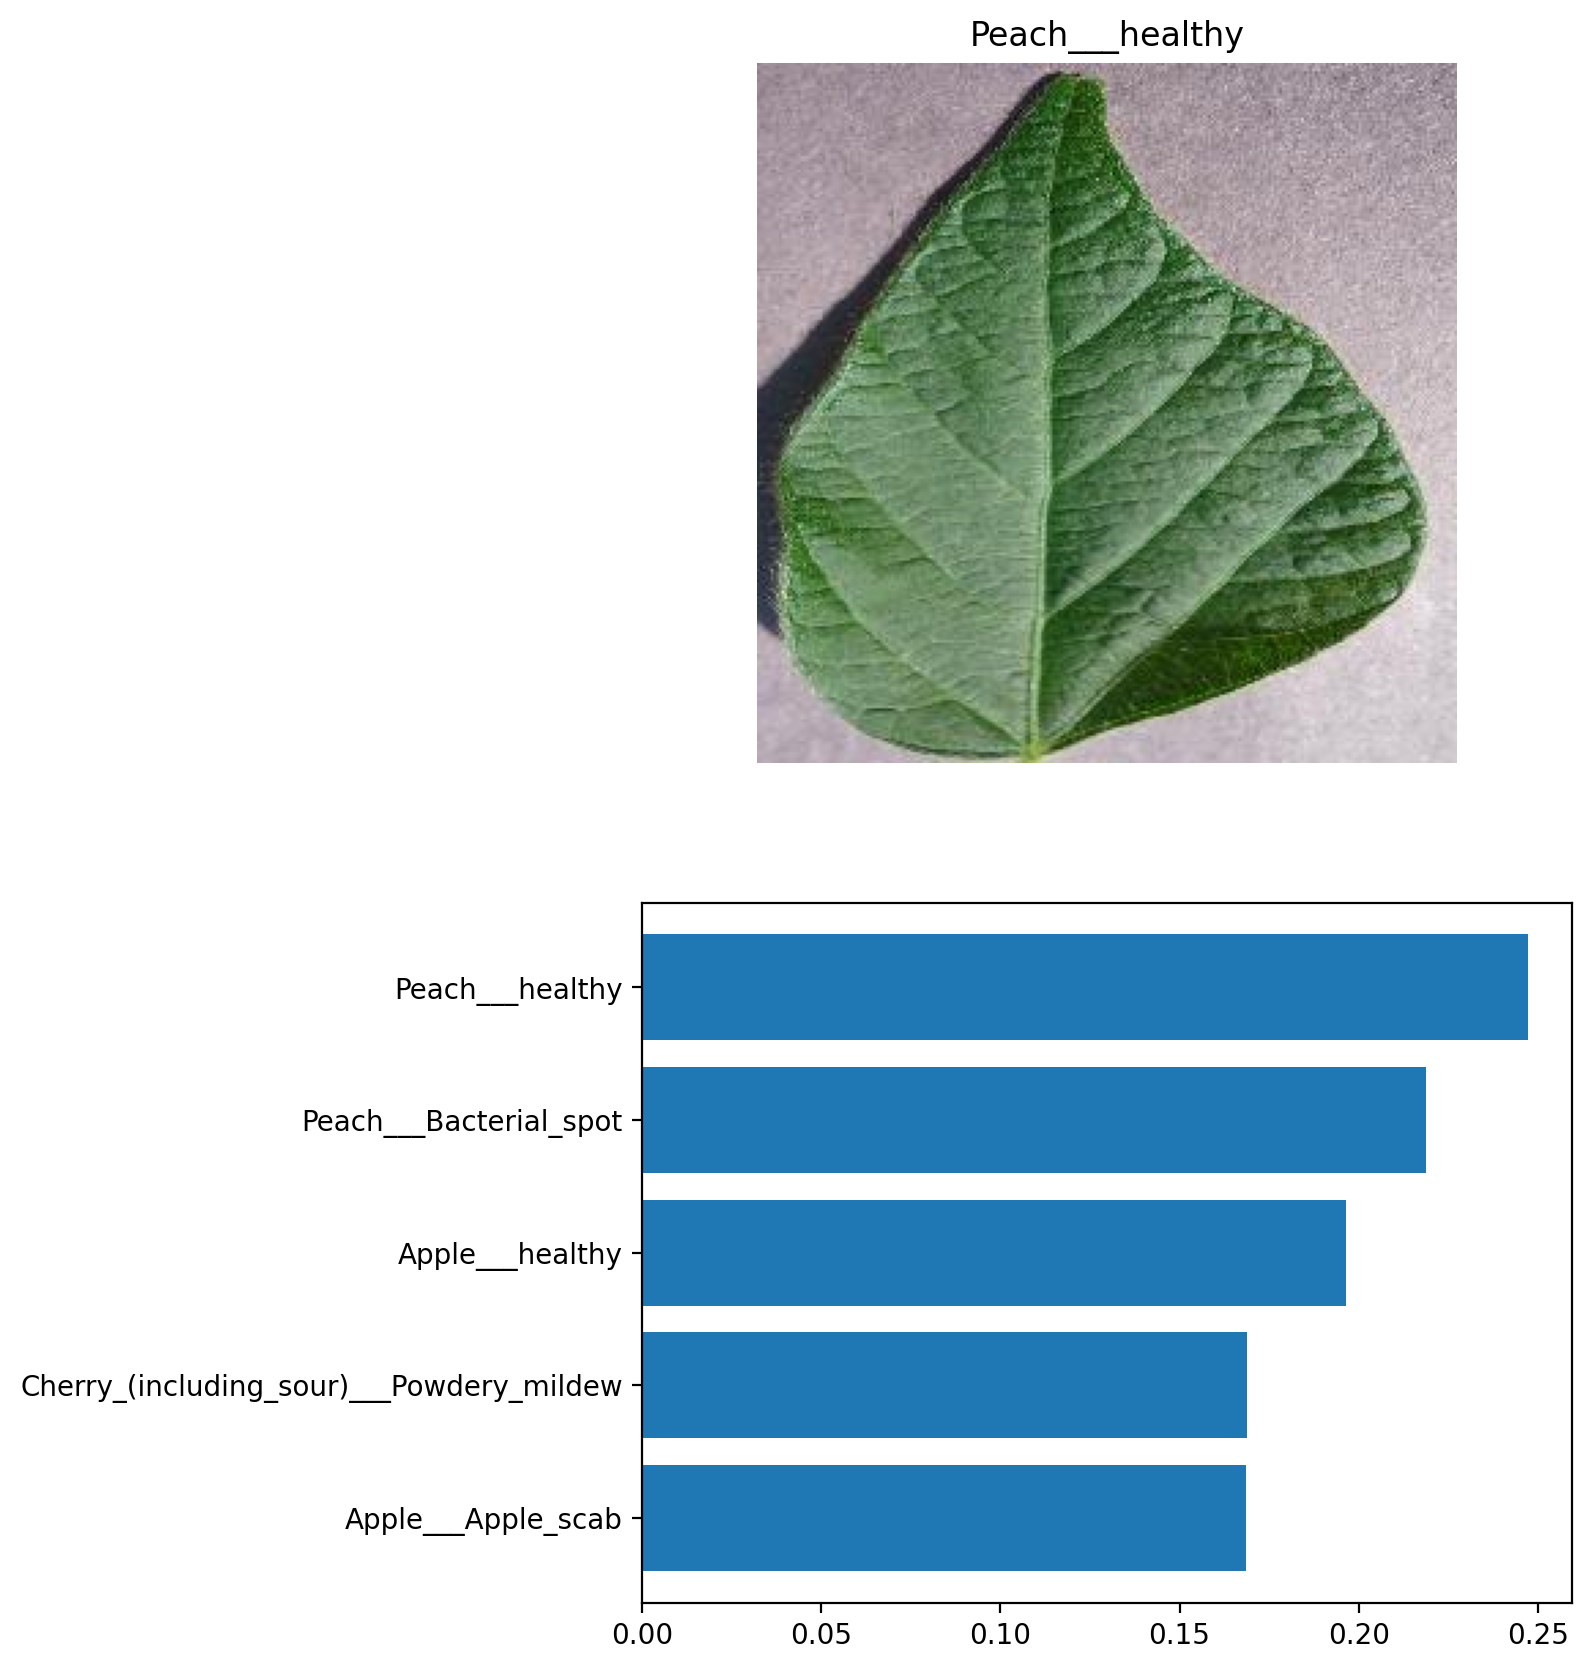

In [128]:
Prediction().plot_top_class(random_img_path, top_p, cls_label)